<a href="https://colab.research.google.com/github/DennisB676/DennisB676/blob/main/LinearREG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [ ]:
BrooklynHousing = pd.read_csv('/content/Dzianis_NYC_Housing.csv')


In [ ]:
BrooklynHousing.head()

,location,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,zipcode
0,BAY RIDGE,6/1/2012,215000,3,1.00,1180,5650,1180,0,1928.0,11209
1,BAY RIDGE,7/11/2012,215000,3,2.25,2570,7242,2170,400,1940.0,11209
2,BAY RIDGE,5/24/2012,215000,2,1.00,770,10000,770,0,1954.0,11209
3,BAY RIDGE,12/20/2012,215000,4,3.00,1960,5000,1050,910,1954.0,11209
4,BAY RIDGE,10/25/2012,217000,3,2.00,1680,8080,1680,0,1954.0,11209


In [ ]:
BrooklynHousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location       1999 non-null   object 
 1   date           1999 non-null   object 
 2   price          1999 non-null   int64  
 3   bedrooms       1999 non-null   int64  
 4   bathrooms      1999 non-null   float64
 5   sqft_living    1999 non-null   int64  
 6   sqft_lot       1999 non-null   int64  
 7   sqft_above     1999 non-null   int64  
 8   sqft_basement  1999 non-null   int64  
 9   yr_built       1948 non-null   float64
 10  zipcode        1999 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 171.9+ KB


In [ ]:
BrooklynHousing.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,zipcode
count,1.999000e+03,1999.000000,1999.000000,1999.000000,1.999000e+03,1999.000000,1999.000000,1948.000000,1999.000000
mean,2.114810e+06,3.385193,2.073287,2074.165583,1.538802e+04,1769.624812,304.540770,1907.730493,11214.656328
std,8.590464e+06,0.894148,0.758878,913.917933,4.627391e+04,825.042792,451.344537,483.228136,9.750565
min,2.000000e+05,0.000000,0.000000,380.000000,6.490000e+02,380.000000,0.000000,0.000000,11205.000000
25%,4.730000e+05,3.000000,1.500000,1420.000000,5.472000e+03,1190.000000,0.000000,1915.000000,11209.000000
50%,7.500000e+05,3.000000,2.000000,1910.000000,8.030000e+03,1550.000000,0.000000,1925.000000,11209.000000
75%,1.149500e+06,4.000000,2.500000,2505.000000,1.140000e+04,2170.000000,600.000000,1955.000000,11220.000000
max,2.769470e+08,8.000000,6.000000,8010.000000,1.651359e+06,6720.000000,2390.000000,19510.000000,11249.000000


In [ ]:
BrooklynHousing.columns

Index(['location', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode'],
      dtype='object')

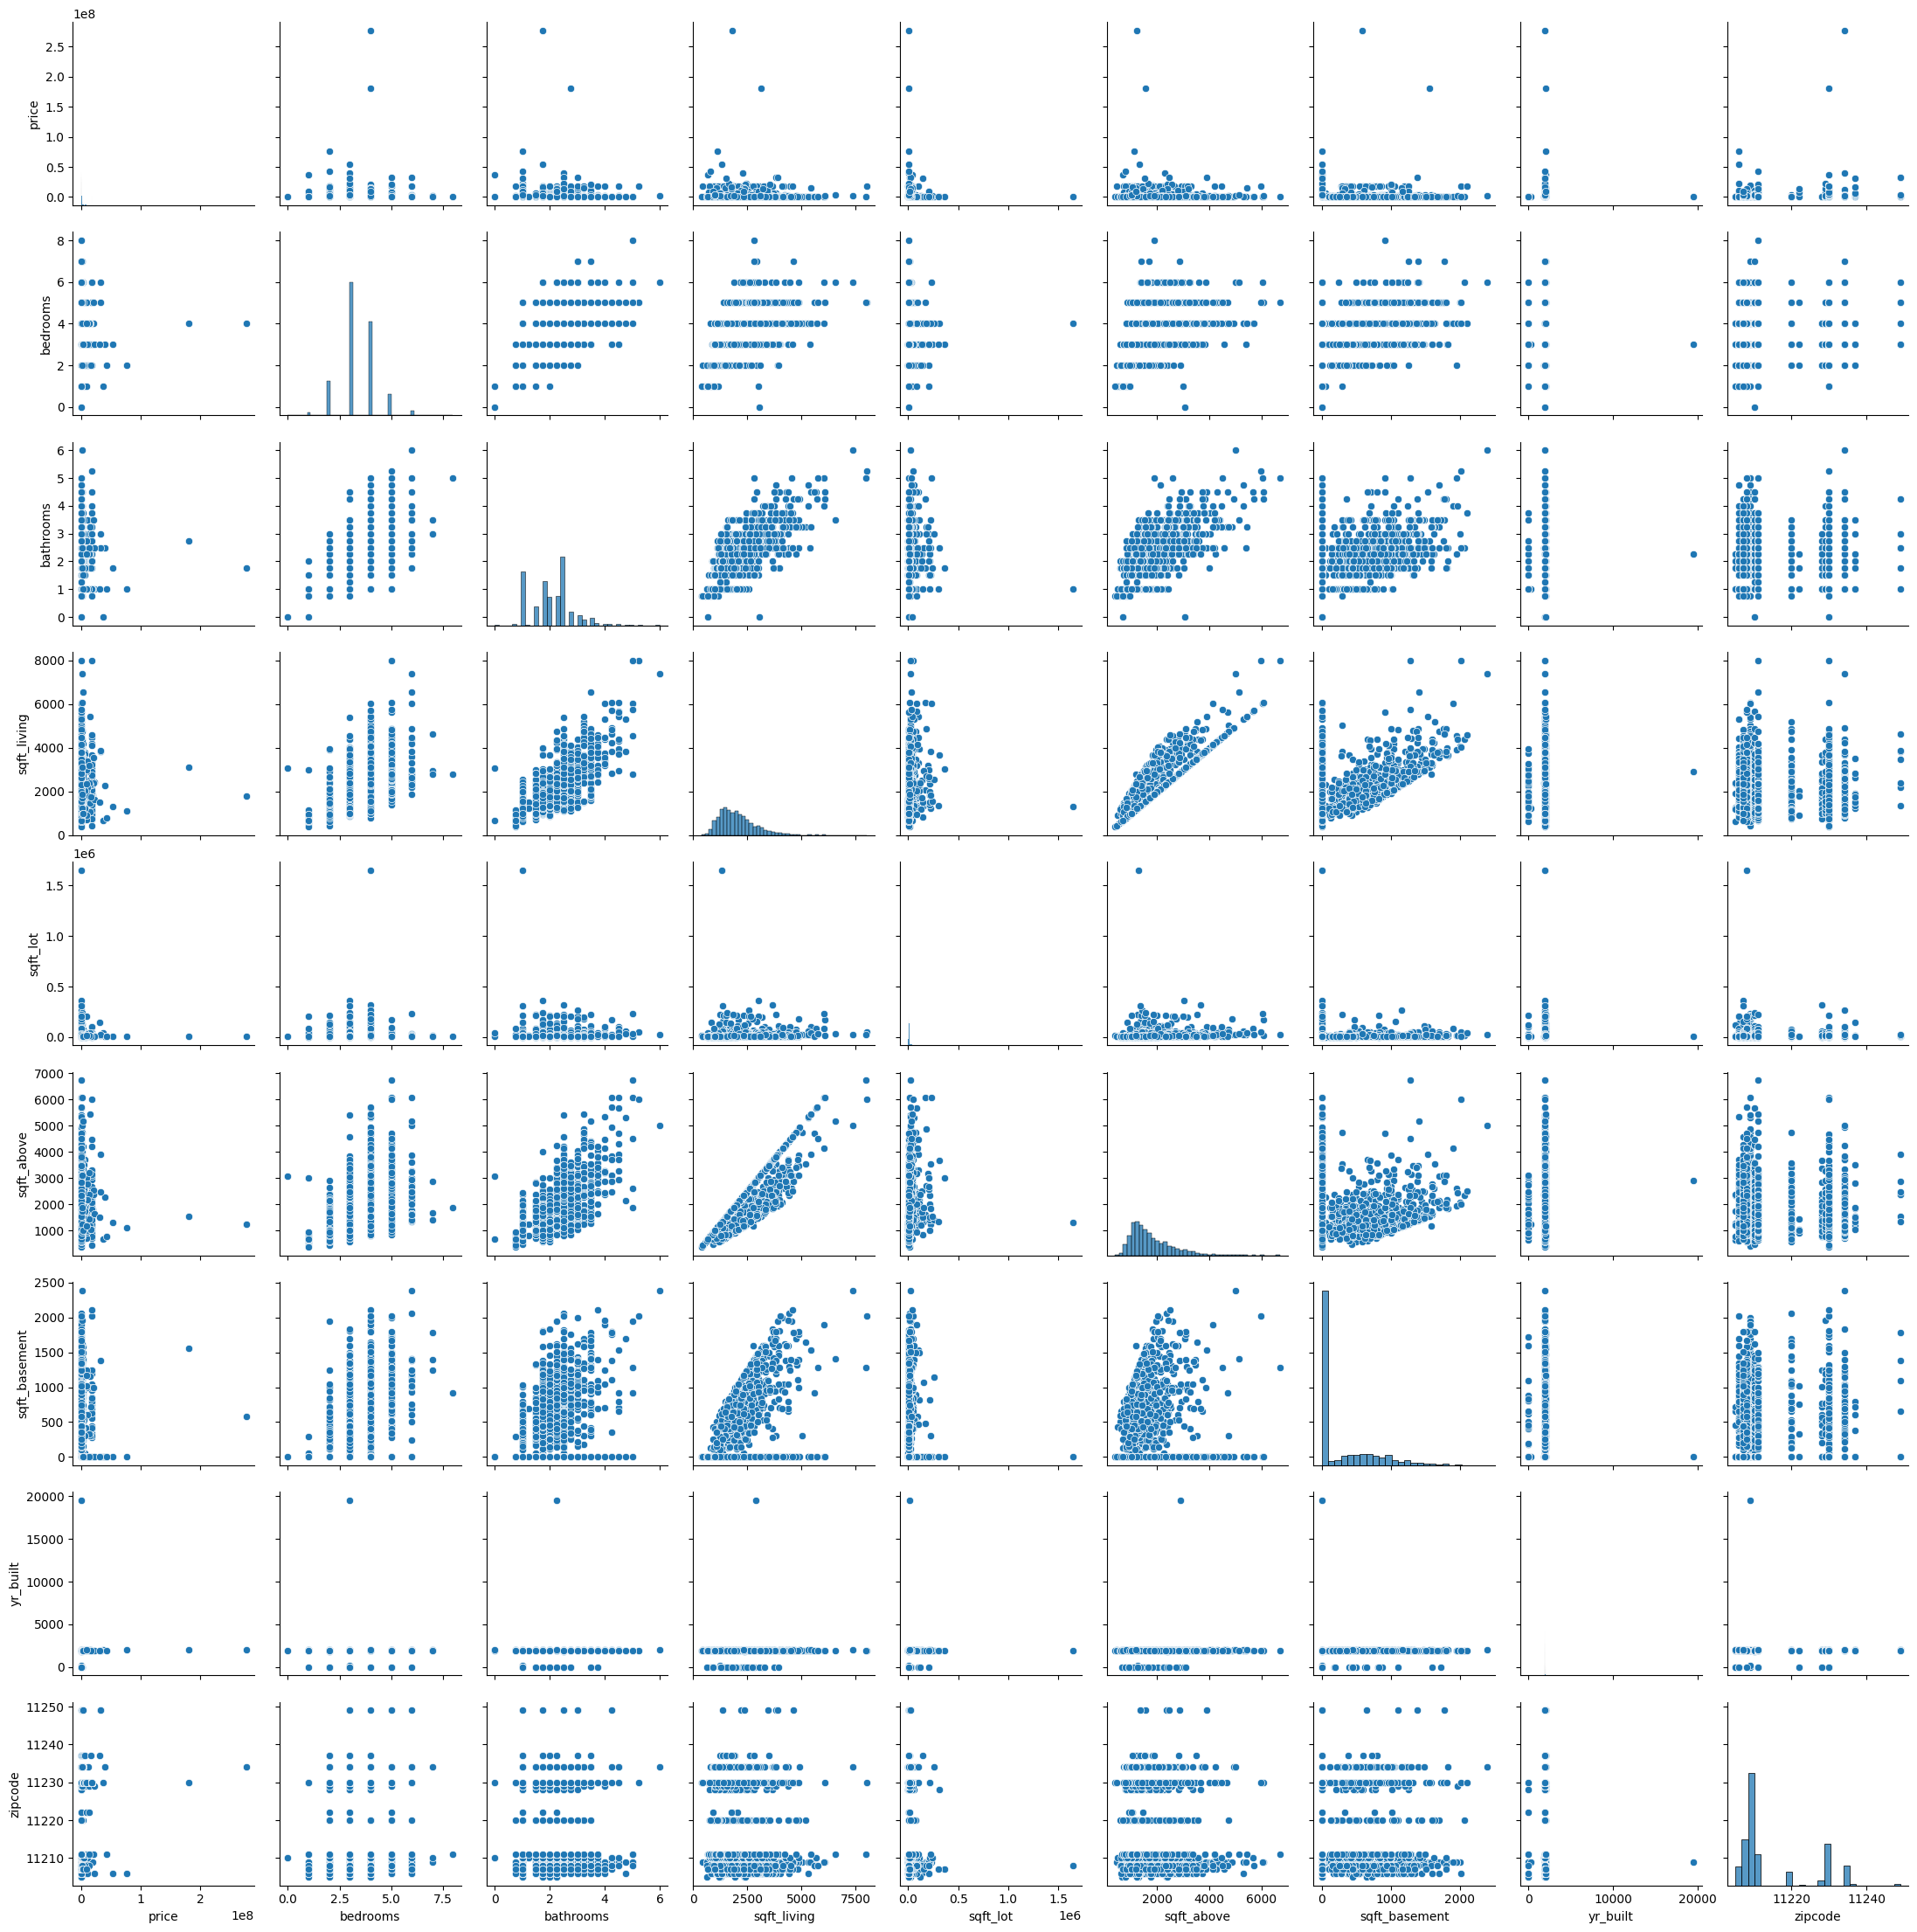

In [ ]:
sns.pairplot(BrooklynHousing)

<ipython-input-256-5fb1cae7771b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(BrooklynHousing['price'])


<Axes: xlabel='price', ylabel='Density'>

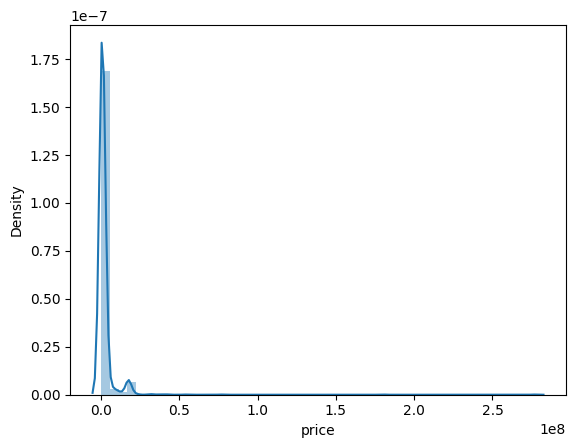

In [ ]:
sns.distplot(BrooklynHousing['price'])


<ipython-input-257-e2f5781f2dee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(BrooklynHousing.corr())


<Axes: >

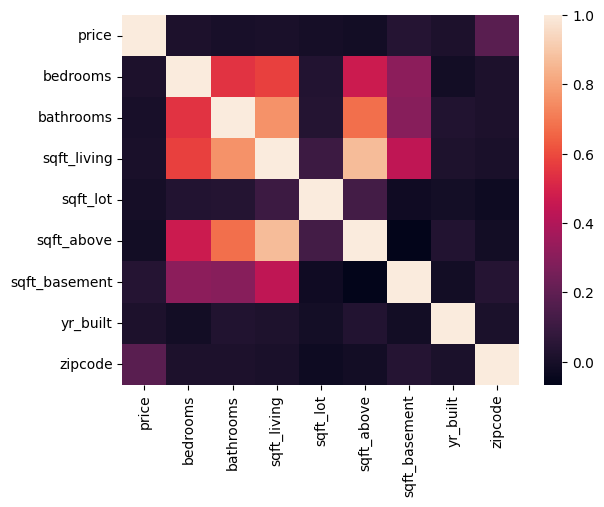

In [ ]:
sns.heatmap(BrooklynHousing.corr())

In [ ]:
X = BrooklynHousing[['bedrooms','bathrooms','sqft_lot','sqft_living','sqft_above']]
y = BrooklynHousing['price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)


LinearRegression()

In [ ]:
print(lm.intercept_)

2551978.878029256


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,51196.220896
bathrooms,-226787.177827
sqft_lot,-1.574557
sqft_living,88.163049
sqft_above,-195.372547


In [ ]:
predictions = lm.predict(X_test)

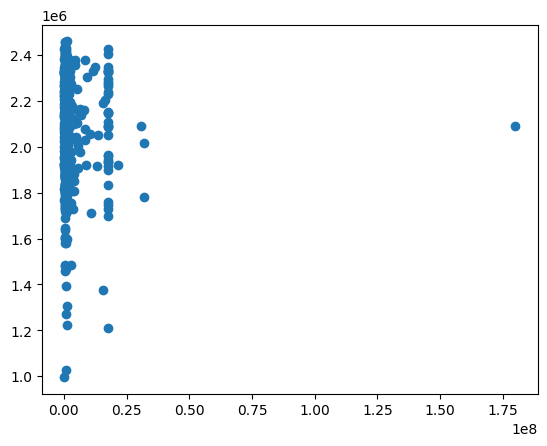

In [ ]:
plt.scatter(y_test,predictions)

<ipython-input-268-5f2bc21c0ef7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


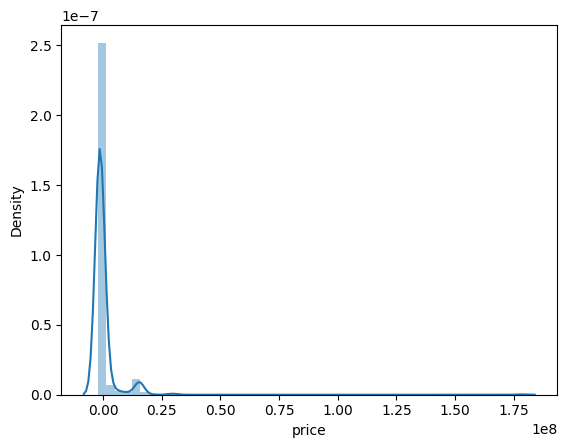

In [ ]:
sns.distplot((y_test-predictions),bins=50);

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2442842.4990728106
MSE: 57356915771051.26
RMSE: 7573434.872701505


In [ ]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train) # gets the parameters for the rfr model
rfr_cv = cross_val_score(rfr,X, y, cv = 5, scoring = 'r2')
print("R2: ", rfr_cv.mean())

R2:  -22.14585918759918


In [ ]:
rfr.feature_importances_

array([0.10173846, 0.12745241, 0.33931333, 0.1851416 , 0.2463542 ])

In [ ]:
importance = rfr.feature_importances_

# map feature importance values to the features
feature_importances = zip(importance, X.columns)
#list(feature_importances)

sorted_feature_importances = sorted(feature_importances, reverse = True)
#print(sorted_feature_importances)

top_15_predictors = sorted_feature_importances[0:15]
values = [value for value, predictors in top_15_predictors]
predictors = [predictors for value, predictors in top_15_predictors]
print(predictors)

['sqft_lot', 'sqft_above', 'sqft_living', 'bathrooms', 'bedrooms']


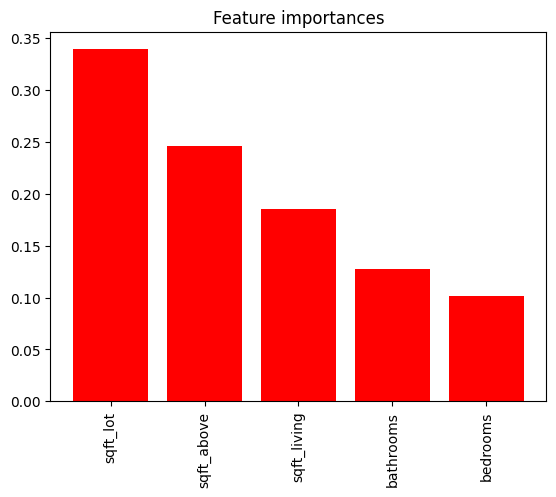

In [ ]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(predictors)), values,color="r", align="center");
plt.xticks(range(len(predictors)), predictors, rotation=90);